# This notebook will serve the EDA for the cleaned dataset that we used for modeling

## 1. Libraries and loading CSV

In [1]:
# Import necassary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# load dataset
df_master = pd.read_csv('../data/tiny_master.csv')

In [10]:
# First look at the dataset
df_master.head()

,listing_id,yearmonth,result_views,expose_views,year,month,1_room_apartment,dining_room,en_suite_bathroom,kitchen,...,pool,sauna,grill,garden,terrace,balcony,bathrooms,bedrooms,max_guests,living_area
0,97232bc1-cee6-54cc-9965-be13177051d3,2019-01-01,2468.0,977.0,2019,1,0.0,0.0,0.0,1.0,...,1,1,1,1,0,1,1.0,2.0,4.0,60.0
1,97232bc1-cee6-54cc-9965-be13177051d3,2019-02-01,2930.0,1051.0,2019,2,0.0,0.0,0.0,1.0,...,1,1,1,1,0,1,1.0,2.0,4.0,60.0
2,97232bc1-cee6-54cc-9965-be13177051d3,2019-12-01,2183.0,512.0,2019,12,0.0,0.0,0.0,1.0,...,1,1,1,1,0,1,1.0,2.0,4.0,60.0
3,97232bc1-cee6-54cc-9965-be13177051d3,2019-12-01,2183.0,512.0,2019,12,0.0,0.0,0.0,1.0,...,1,1,1,1,0,1,1.0,2.0,4.0,60.0
4,97232bc1-cee6-54cc-9965-be13177051d3,2019-01-01,2468.0,977.0,2019,1,0.0,0.0,0.0,1.0,...,1,1,1,1,0,1,1.0,2.0,4.0,60.0


In [9]:
del df_master['Unnamed: 0']

In [11]:
# Shape of the dataset
print('The dataset contains %s inquiries and %s features' %(df_master.shape[0], df_master.shape[1]))

The dataset contains 1117201 inquiries and 85 features


In [12]:
# First description of the numerical features
round(df_master.describe(),3)

,result_views,expose_views,year,month,1_room_apartment,dining_room,en_suite_bathroom,kitchen,kitchen_living,living_bedroom,...,pool,sauna,grill,garden,terrace,balcony,bathrooms,bedrooms,max_guests,living_area
count,1117201.000,1117201.000,1117201.000,1117201.000,1117201.000,1117201.000,1117201.000,1117201.000,1117201.000,1117201.000,...,1117201.000,1117201.000,1117201.000,1117201.000,1117201.000,1117201.000,1117201.000,1117201.000,1117201.000,1117201.000
mean,2690.247,421.296,2019.626,7.434,0.006,0.054,0.010,0.743,0.144,0.175,...,0.063,0.132,0.452,0.854,0.553,0.374,1.059,1.371,4.054,66.330
std,4858.059,743.379,0.484,2.387,0.074,0.225,0.099,0.437,0.351,0.380,...,0.243,0.339,0.498,0.353,0.497,0.484,0.341,0.704,1.396,22.654
min,0.000,0.000,2019.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,695.000,113.000,2019.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,3.000,50.000
50%,1143.000,205.000,2020.000,7.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,4.000,63.000
75%,2302.000,390.000,2020.000,9.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,0.000,1.000,1.000,1.000,1.000,1.000,2.000,5.000,80.000
max,66849.000,17693.000,2020.000,12.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,2.000,3.000,8.000,140.000


In [13]:
# First look at the info
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117201 entries, 0 to 1117200
Data columns (total 85 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   listing_id                      1117201 non-null  object 
 1   yearmonth                       1117201 non-null  object 
 2   result_views                    1117201 non-null  float64
 3   expose_views                    1117201 non-null  float64
 4   year                            1117201 non-null  int64  
 5   month                           1117201 non-null  int64  
 6   1_room_apartment                1117201 non-null  float64
 7   dining_room                     1117201 non-null  float64
 8   en_suite_bathroom               1117201 non-null  float64
 9   kitchen                         1117201 non-null  float64
 10  kitchen_living                  1117201 non-null  float64
 11  living_bedroom                  1117201 non-null  float64
 12  

In [14]:
# Looking for missing values
df_master.isna().sum()

listing_id      0
yearmonth       0
result_views    0
expose_views    0
year            0
               ..
balcony         0
bathrooms       0
bedrooms        0
max_guests      0
living_area     0
Length: 85, dtype: int64

## 2. Convert features in right data type

In [15]:
# First delete not redundant date features
df_master = df_master.drop(['yearmonth', 'year', 'month', 'date'],axis=1)

In [16]:
# Convert column contract_end to datetime
df_master['arrival_date'] = pd.to_datetime(df_master['arrival_date'])
df_master['departure_date'] = pd.to_datetime(df_master['departure_date'])
df_master['year_arrival'] = pd.DatetimeIndex(df_master['arrival_date']).year
df_master['month_arrival'] = pd.DatetimeIndex(df_master['arrival_date']).month

## 3. Correlations

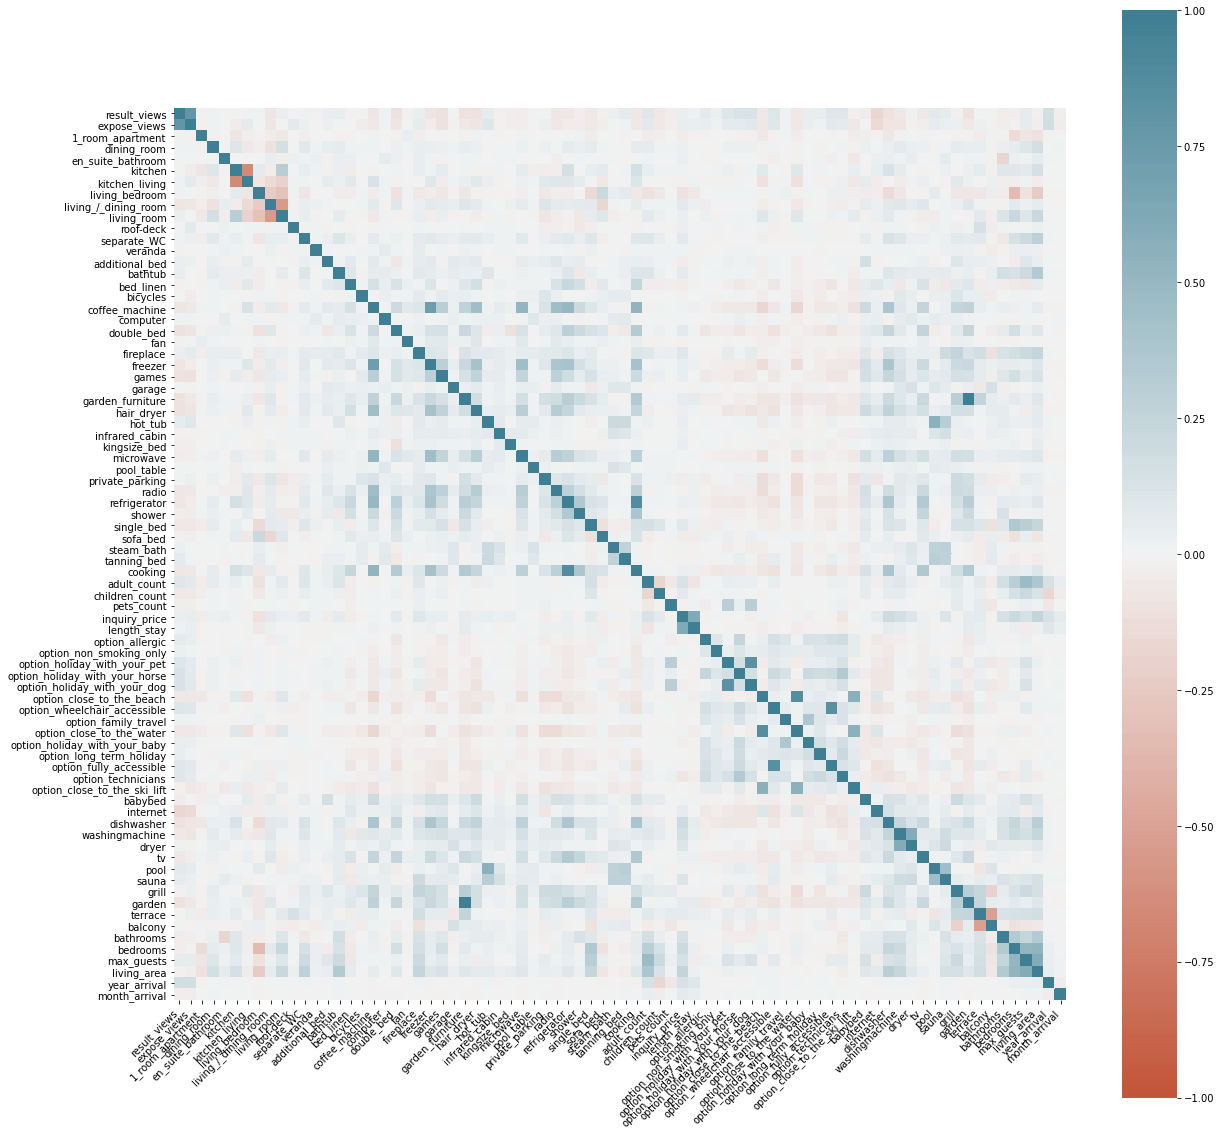

In [19]:
# generate the heatmap
corr = df_master.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [20]:
# Generate table with correlations 
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
## 4. Scatterplot?
deeper look at the features
average inquiry count for test dataset

In [ ]:
sns.set_context("talk", font_scale=1.5)